# Data Exploration 03

In [ ]:
import datetime
now = datetime.datetime.now()
print(f'Version: {now.strftime("%Y-%m-%d %H:%M:%S")}')

# Benchmark Dataset

In [10]:
from utils import utils
import pandas as pd

dataset = './data/dataset_benchmark.csv'
featureset = './features_benchmark.yaml'

# df, x, y, x_train, x_test, y_train, y_test = utils.load_benchmark_dataset(dataset, featureset, dropna=True)
df, x, y, x_train, x_test, y_train, y_test = utils.load_benchmark_dataset(dataset, featureset)

Loading dataset from ./data/dataset_benchmark.csv
Loading features from ./features_benchmark.yaml
dataset length: 8882
x_train length: 7993
y_train length: 7993
x_test length: 889
y_test length: 889


In [ ]:
# state changes
n_state_changes = (df['diagnosis_encoded'] != df['target_diagnosis_encoded']).sum()

print(f'state changes: {n_state_changes}')
print(f'state changes as frac of dataset: {n_state_changes / len(df)}')

In [ ]:
# state changes per patient
n_state_changes_per_patient = x.groupby('RID').apply(lambda x: x['diagnosis_encoded'] != y).groupby('RID').sum().value_counts()
print(f'{n_state_changes_per_patient}')

print(f'{(n_state_changes_per_patient.sum() - n_state_changes_per_patient[0]) / n_state_changes_per_patient.sum()}')

In [7]:
# state changes
n_state_changes = (df['diagnosis'] != df['target_diagnosis']).sum()

print(f'state changes: {n_state_changes}')
print(f'state changes as frac of dataset: {n_state_changes / len(df)}')

KeyError: 'diagnosis'

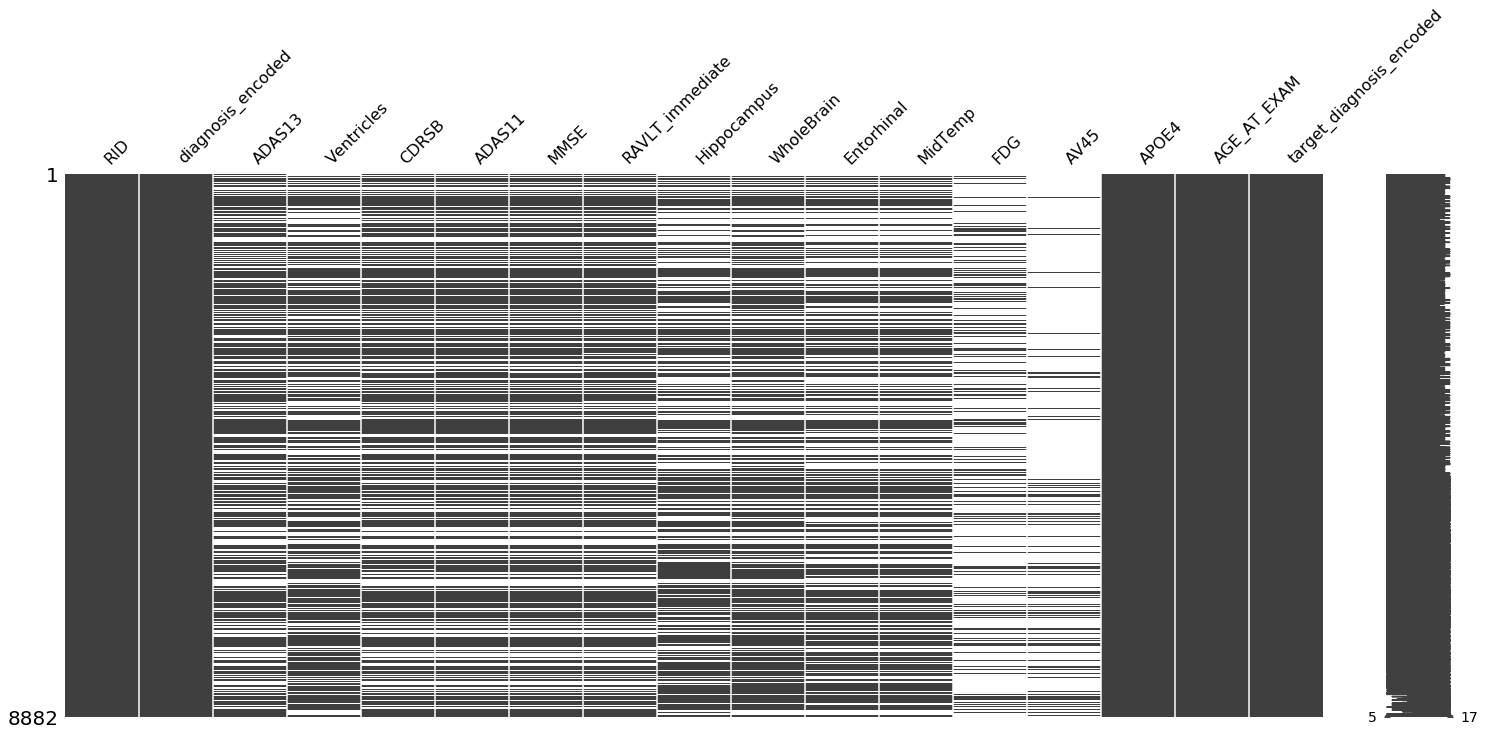

In [5]:
import missingno as msno
msno.matrix(df)

In [ ]:
msno.bar(df)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(temp_y)

In [ ]:
from yellowbrick.features import rank1d, rank2d, radviz

rank1d(df.drop(columns=['RID','diagnosis', 'target_diagnosis']))

In [ ]:
rank2d(df.drop(columns=['RID','diagnosis', 'target_diagnosis']))

In [ ]:
from yellowbrick.features import pca_decomposition

pca_decomposition(x, temp_y, projection=2)

In [ ]:
from yellowbrick.features import ExplainedVariance

# Plotting individual variances + Kaiser
viz = ExplainedVariance(kaiser=True)
viz.fit(x)              # Fit the data to the visualizer
viz.transform(X)        # Transform the data
viz.poof()              # Draw/show/poof the data

# Scree plot
viz2 = ExplainedVariance(scree=True)
viz2.fit(x)
viz2.transform(X)
viz2.poof()

In [ ]:
from yellowbrick.features import radviz

vis = radviz(x, temp_y)

In [ ]:
from yellowbrick.features import parallel_coordinates

parallel_coordinates(x_scaled, temp_y)

In [ ]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation()
visualizer.fit(x, temp_y)

In [ ]:
visualizer = FeatureCorrelation(method='mutual_info-classification')
visualizer.fit(x, temp_y)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)
x_imp = imp.fit_transform(x_na)
x_imp = pd.DataFrame(data=x_imp, columns=x_na.columns)

In [ ]:
pca_decomposition(x_imp, temp_y_na, projection=2)

In [ ]:
rank2d(x)

In [ ]:
rank2d(x_imp)

In [ ]:
visualizer = FeatureCorrelation()
visualizer.fit(x_imp, temp_y_na)

In [ ]:
x_imp['AGE_AT_EXAM'].hist()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

svc_1 = SVC(random_state=42, probability=True)
svc_2 = SVC(random_state=42, probability=True)

scaled_svc_1 = Pipeline([
    ('scaler', scaler_1),
    ('svc', svc_1)
])

scaled_svc_2 = Pipeline([
    ('scaler', scaler_2),
    ('svc', svc_2)
])

# scaled_svc_1.fit(x_train, y_train)
# scaled_svc_2.fit(imp.transform(x_train_na), y_train_na)


In [ ]:
from yellowbrick.classifier import ROCAUC

print(y_test.value_counts())

visualizer_1 = ROCAUC(scaled_svc_1, macro=False)
visualizer_1.fit(x_train, y_train)
visualizer_1.score(x_test, y_test)
visualizer_1.show()
plt.show()

In [ ]:
print(y_test_na.value_counts())

visualizer_2 = ROCAUC(scaled_svc_2, macro=False)
visualizer_2.fit(imp.transform(x_train_na), y_train_na)
visualizer_2.score(imp.transform(x_test_na), y_test_na)
visualizer_2.show()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

preds_1 = scaled_svc_1.predict_proba(x_test)
preds_2 = scaled_svc_2.predict_proba(imp.transform(x_test_na))

roc_auc_score(y_test, preds_1, multi_class='ovo'), roc_auc_score(y_test_na, preds_2, multi_class='ovo')

In [ ]:
x.columns

In [ ]:
x_features_subset = ['diagnosis_encoded', 'ADAS13',  'CDRSB', 'ADAS11', 'MMSE',
                     'RAVLT_immediate']

In [ ]:
scaler = StandardScaler()

svc = SVC(random_state=42, probability=True)

scaled_svc_1 = Pipeline([
    ('scaler', scaler),
    ('svc', svc)
])

preds = scaled_svc_2.predict_proba(imp.transform(x_test_na))

roc_auc_score(y_test, preds, multi_class='ovo')